In [1]:
!pip install PyPDF2 nltk py-readability-metrics wordcloud matplotlib

In [9]:
import nltk
import matplotlib.pyplot as plt
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize
from PyPDF2 import PdfReader
from readability import Readability
from readability.exceptions import ReadabilityException
from wordcloud import WordCloud

In [43]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\tejas\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

#### Article Overview :
The from Fox News and Reuters both cover the plagiarism allegations involving Harvard University President Claudine Gay. The allegations concern improper citation and academic integrity in her past scholarly work, including her dissertation and published research.
While both articles report on the same event, their framing differs. Fox News leans more toward a narrative of scandal and pressure, whereas Reuters focuses on institutional actions and outcomes. This contrast reflects differences in editorial tone and reporting style between the outlets.

In [45]:
def extract_text_from_pdf(path):
    reader = PdfReader(path)
    text = ''
    for page in reader.pages:
        text += page.extract_text()
    return text

reuters_text = extract_text_from_pdf('reuters.com-Harvard president will submit dissertation edits after plagiarism allegations.pdf')
fox_text = extract_text_from_pdf('foxnews.com-Embattled Harvard University President Claudine Gay hit with more plagiarism charges.pdf')

print('Reuters Preview:', reuters_text[:650])
print('Fox News Preview:', fox_text[:650])

Reuters Preview: 1 / 3Gabriella BorterHarvard president will submit dissertation edits after
plagiarism allegations
reuters.com /world/us/embattled-harvard-president-will-submit-dissertation-edits-after-plagiarism-2023-12-21
Harvard University President Claudine Gay testifies before a House Education and The
Workforce Committee hearing titled "Holding Campus Leaders Accountable and Confronting
Antisemitism" on Capitol Hill in W ashington, U.S., December 5, 2023. REUTERS/Ken
Cedeno/File Photo Acquire Licensing Rights
Dec 21 (Reuters) - Harvard University's president was planning to submit three corrections to
her 1997 dissertation after a committee investigati
Fox News Preview: 1 / 5Brian FloodEmbattled Harvard University President Claudine Gay hit
with more plagiarism charges
foxnews.com /media/embattled-harvard-university-president-claudine-gay-hit-more-plagiarism-charges
Media
Harvard ‘received a complaint outlining over 40 allegations of
plagiarism,’ according to the Free Beacon
 By

### Anomalies Noted

The Reuters article text was extracted, but it included extra elements like page numbers, author names, URLs, and licensing info. Some line breaks and spacing were also messy.

The Fox News article was clearer but still had some formatting issues like headlines, repeated author credits, and time stamps.

In [47]:
sia = SentimentIntensityAnalyzer()

fox_scores = sia.polarity_scores(fox_text)
reuters_scores = sia.polarity_scores(reuters_text)

print("Fox News Sentiment:", fox_scores)
print("Reuters Sentiment:", reuters_scores)


Fox News Sentiment: {'neg': 0.065, 'neu': 0.866, 'pos': 0.07, 'compound': 0.7243}
Reuters Sentiment: {'neg': 0.07, 'neu': 0.904, 'pos': 0.026, 'compound': -0.9719}


#### Thoughts on Sentiment Analysis Results :
The results show Fox News had a positive compound score (0.72), while Reuters had a strong negative compound score (-0.97). The analysis is , Fox felt more dramatic, and Reuters felt more neutral. This was unexpected since Fox felt more intense and Reuters seemed neutral when reading. Overall, I partly agree with the results, even though they don’t fully match my initial impression.

In [49]:
fox_headline = "Embattled Harvard University President Claudine Gay hit with more plagiarism charges"
reuters_headline = "Harvard president will submit dissertation edits after plagiarism allegations"

fox_headline_sentiment = sia.polarity_scores(fox_headline)
reuters_headline_sentiment = sia.polarity_scores(reuters_headline)

print("Fox Headline Sentiment:", fox_headline_sentiment)
print("Reuters Headline Sentiment:", reuters_headline_sentiment)


Fox Headline Sentiment: {'neg': 0.192, 'neu': 0.808, 'pos': 0.0, 'compound': -0.3353}
Reuters Headline Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


#### Thoughts on Sentiment Analysis Results (Headlines):
The results show Fox's headline had a negative compound score (–0.33), while Reuters had a neutral score (0.0). This is different from the overall article sentiment, where Fox was strongly positive and Reuters was strongly negative. The Fox headline used more negative words like “embattled” and “plagiarism,” which may explains the shift. Reuters, on the other hand, kept the headline very neutral and factual. Overall, the headline sentiment doesn’t fully match the article tone but reflects how headlines can shape first impressions.

In [79]:
def readability_scores(text):
    r = Readability(text)
    scores = {}
    scores["Flesch Reading Ease"] = round(r.flesch().score,2)         
    scores["Flesch-Kincaid Grade"] = r.flesch_kincaid().grade_level     
    scores["Gunning Fog Index"] = round(r.gunning_fog().score,2)         
    scores["Coleman-Liau Index"] = round(r.coleman_liau().score,2)       
    scores["Automated Readability Index"] = round(r.ari().score,2)       
    try:
        scores["SMOG Index"] = r.smog().score
    except Exception as e:
        scores["SMOG Index"] = f"Error: {e}"
    return scores

fox_scores = readability_scores(fox_text)
reuters_scores = readability_scores(reuters_text)

df = pd.DataFrame([fox_scores, reuters_scores], index=["Fox News", "Reuters"]).T

display(df)


,Fox News,Reuters
Flesch Reading Ease,21.41,16.55
Flesch-Kincaid Grade,19,19
Gunning Fog Index,21.87,19.59
Coleman-Liau Index,13.41,15.24
Automated Readability Index,21.36,20.43
SMOG Index,Error: SMOG requires 30 sentences. 23 found,Error: SMOG requires 30 sentences. 17 found


#### Readability Metrics Overview : 
Flesch Reading Ease – Measures how easy a text is to read.

Flesch-Kincaid Grade Level – Estimates the U.S. school grade level required to understand the text.

Gunning Fog Index – Shows the years of formal education a reader needs to comprehend the text easily.

Coleman-Liau Index – Also estimates grade level but uses character and sentence length instead of syllables.

Automated Readability Index (ARI) – Similar to Coleman-Liau, indicating grade level based on characters and words.

SMOG Index – Focuses on complex words (polysyllabic) to estimate the education level required for clear understanding.

#### Fox’s article is easier to read, with a higher reading ease score and lower grade level. Reuters uses more complex language, making it harder to read and better suited for a more advanced audience.

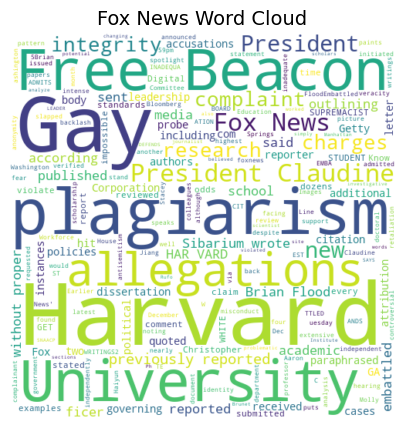

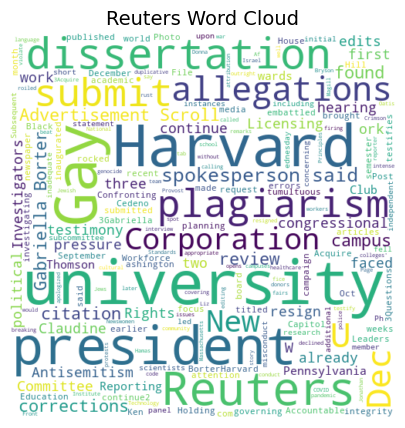

In [90]:
def generate_wordcloud(text, title):
    wc = WordCloud(width=500, height=500, background_color='white', stopwords=set(stopwords.words('english')))
    wc.generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=14)
    plt.show()

generate_wordcloud(fox_text, "Fox News Word Cloud")
generate_wordcloud(reuters_text, "Reuters Word Cloud")


#### WordCloud Analysis 
The word clouds clearly highlight the most frequent words used in both articles. In both the Fox News and Reuters articles, words like “Harvard,” “plagiarism,” “allegations,” “Gay,” and “University” dominate, reflecting the central topic of plagiarism allegations involving the Harvard president.

The Fox News word cloud features terms like “Free Beacon” and “complaint,” showing a focus on external sources and the controversy.

The Reuters word cloud highlights words like “dissertation,” “submit,” and “edits,” indicating a more procedural and factual reporting style centered around actions and responses.

Overall, the Fox article emphasizes the controversy and external pressure, while Reuters focuses more on institutional processes and formal details. This aligns well with the sentiment and readability differences observed earlier.